# The Titanic Dataset 


This is the Analysis and Investigation of Titanic Dataset. I chose the Titanic dataset because its more organised, interested and I am familiar with it.



## Introduction

The Titanic was a Brtish passenger liner that sank in the North Atlantic Ocean on her first voyage - after her entry into service - from Southampton to New York City. The disaster - usually considered one of the deadliest maritime disaster in history - happened four days into the ship's voyage on the night of April 14  through the morning of April 15, 1912 and resulted in the death of more than 1500 passengers of the estimated 2,224 passengers aboard the ship. It is reported that there were not enough life boats for pasengers which led to the great loss of life in the disaster. Furthermore, some class of people seemed to have had a better chance of survival than others e.g people travelling with First class tickets or female passengers.

Consequently, the aim of this report is to explore an extract of the titanic dataset containing records of passengers and confirm earlier mentioned speculation about some factors that may have significantly influenced the survival of passengers of the ill-fated ship. This dataset contains crucial information like whether a passenger survived, the gender of passengers, the class of tickets passengers were travellling with etc.

Specifically we'll be using information contined in the data like: whether a passenger survived, the class of tickets that passengers are travelling with, the gender of passengers, the amount of fare paid by passengers and age of passengers. We're interested in answering the following questions:

1. Based on the data, was there any relationship between survival and class of ticket of passengers?
2. Is there relationship/association between survival and gender of passengers?
3. Does the data provide evidence that there's a significant difference in average amount of fare paid by survivors and non survivors?
4. Does the data provide evidence that there's a significant difference in average age of passengers who survived and those that did not?


To start, we read in the titanic dataset and import necessary libraries after which we proceed with exploratory analysis. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 7) #set figure size of plots

# read in the tianic data
df_titanic=pd.read_csv("titanic-data.csv")

## Exploratory Analysis

Next we'll carry out an exploratory analysis of the titanic dataset to get a feel of the data, check for anomalies, missing values and outliers. First we'll have a look at the number of rows and columns of the data.

In [2]:
# shape of data
df_titanic.shape  

(891, 12)

We see from the above output that the dataset has 12 variables containing information on 891 passengers. The first 5 observations of the data are shown below.

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Passengerid tells us the id of the passenger, Survived column tells us whether a passenger survived or not. The Pclass column tells us the passenger class in which a passenger is travelling. The SibSP indicates the number of siblings/spouses aboard the ship. Parch indicates the number of Parents/children aboard the ship. The other variables like Name, Sex and Age reaveals some important demographic information about the passengers. The variables Ticket and Fare provide information on the ticket number and amount of fare paid by the passengers repectively. The Cabin and Embarked columns contains the Cabin number and the port of embarkment of each passenger. We immiediately notice that there are some missing values in the Cabin number variable. Shown below are the last five observations of the dataset.

In [4]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


The last five obersation again reveal some missing values in the Age and Cabin variables. Consequently, we'll check for the distribution of missing values in each column of the dataset.

Shown above are the first five records of the passengers of the Titanic ship. The (Passengerid) shows us the id number of the passenger, (Survived) column tells us whether a passenger survived or not. The (Pclass) column shows us the passenger class in which a passenger is travelling. The (SibSP) indicates the number of siblings/spouses aboard the ship. (Parch) indicates the number of Parents/children aboard the ship.

The following table shows the summary statistics of the data.

In [5]:
#number of missing values in each column
df_titanic.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see from the ouput above that Age and Cabin variables contain a lot of missing values with 177 and 687 observations missing in both variables respectively. The Embarked variable contains 2 missing values which is good thing to see that our primary variable of interest (Survived) does not contain any missing observation. However, with the tangible amount of missing values contained in Age and Cabin, we'll assume that the missing values contained in the Age variable is missing at random and we'll use listwise deletion when using Age in further analysis as the data is large compared to the amount of missing values contained in Age. Next we'll proceed to exploring the numeric variables of the data by computing some summary statistics shown below: 

#### Descriptives and Frequencies

In [6]:
#summary statistics
df_titanic.describe()[["Survived","Age","SibSp","Parch","Fare"]]

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


The output above shows some summary statistics of the Titanic dataset.

The mean of the survived column is 0.3838 which means about 38.4% passengers survived the disaster.

The average age of passengers is about 30 years and the average Fare paid by the passengers is about $32.

Now we will look at the survival rate of the disaster by sex of the passengers.

In [7]:
# change survived values from 0 and 1 to appropriate labels
df_titanic['Survived'].replace([0,1],['Did not survive','Survive'], inplace = True)
# cross tab
survived_tab = pd.crosstab(index=df_titanic["Survived"],columns="Count")
survived_tab

col_0,Count
Survived,
Did not survive,549
Survive,342


In [8]:
survived_tab/survived_tab.sum()

col_0,Count
Survived,
Did not survive,0.616162
Survive,0.383838


In [9]:
Pclass_tab = pd.crosstab(index=df_titanic["Pclass"],columns=["Count"])
Pclass_tab

col_0,Count
Pclass,
1,216
2,184
3,491


In [10]:
Pclass_tab/Pclass_tab.sum()

col_0,Count
Pclass,
1,0.242424
2,0.206510
3,0.551066


In [11]:
sex_tab = pd.crosstab(index=df_titanic["Sex"],columns="Count")
sex_tab/sex_tab.sum()

col_0,Count
Sex,
female,0.352413
male,0.647587


In [12]:
sex_tab/sex_tab.sum()

col_0,Count
Sex,
female,0.352413
male,0.647587


In [13]:
embarked_tab = pd.crosstab(index=df_titanic["Embarked"],columns="Count")
embarked_tab

col_0,Count
Embarked,
C,168
Q,77
S,644


In [14]:
(embarked_tab/embarked_tab.sum())

col_0,Count
Embarked,
C,0.188976
Q,0.086614
S,0.724409


From the ouputs above, we discover that about 38% of the passengers survived the disaster while about 62% died in the disaster. Most of the passengers in the titanic disaster travelled in the third class with about 55% of the passengers in the third class, 21% in second class and 24% in first class. Furthermore, about 65% of the passengers are males while about 35% are females. Finally, most of the passengers embarked at Southampton about 72% while about 9% and 19% boarded at Queenstown and Cherbourg respectively.      

To continue with exploring the data, we'll have a look at the survival rate of the disaster by sex of the passengers

#### Survival Rate by Sex

In [15]:
# define helper function for creating well labeled cross tabs
def survial_tab(index_var, column_var, index_names, column_names = None):
    tab = pd.crosstab(index=index_var,columns=column_var, margins = True)
    index_names.append("Column_total")
    tab.index = index_names # set row names
    if (column_names is not None):
        column_names.append("Row_total") # set column names if provided
        tab.columns = column_names
    return tab

# Explore Survival rate by Sex using helper function

survival_sex = survial_tab(df_titanic["Survived"],
                           df_titanic["Sex"],
                           ["Died","Survived"],
                           ["Female","Male"])
survival_sex

,Female,Male,Row_total
Died,81,468,549
Survived,233,109,342
Column_total,314,577,891


From the above table, it is obvious that more female passengers survived the disaster compared to the male passengers. This is further confirmed by the table of survival rate below where we notice that about 74% of female survived compared to only about 19% for their male counterparts. 

In [16]:
survival_sex/survival_sex.ix["Column_total"]

,Female,Male,Row_total
Died,0.257962,0.811092,0.616162
Survived,0.742038,0.188908,0.383838
Column_total,1.000000,1.000000,1.000000


The graph below shows that most of the passengers that survived were females and most of the passengers that died were males.

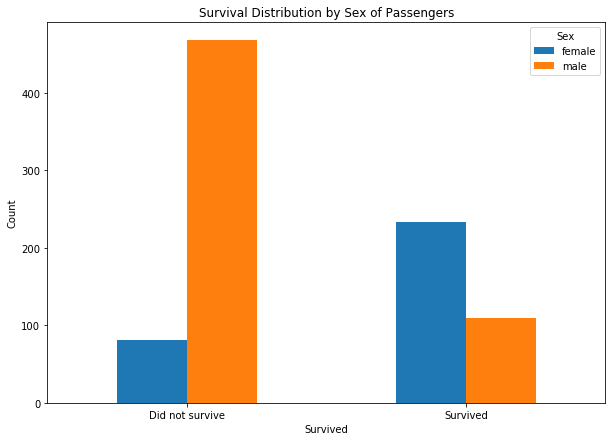

In [17]:
# bar chart
ax = pd.crosstab(
    index=df_titanic["Survived"],columns=df_titanic["Sex"]).plot(
    kind = "bar",title = "Survival Distribution by Sex of Passengers")

ax.set_xticklabels(["Did not survive", "Survived"], rotation="horizontal")
ax.set_ylabel("Count")

### Survival Rate by Class of Passengers

Next we will explore the survival rate by the class in which the passengers were travelling in. 

The following table shows the **Survived** variable by **Pclass** 

In [18]:
# Explore Survival rate by Class of Passengers
survival_class = pd.crosstab(index=df_titanic["Survived"],columns=df_titanic["Pclass"], margins = True)
survival_class.index = ["Died","Survived","Column_total"]
survival_class

Pclass,1,2,3,All
Died,80,97,372,549
Survived,136,87,119,342
Column_total,216,184,491,891


The table above shows that more passengers travelling in the first class section of the ship survived as compared to passengers travelling in the second class and thrid class. 

The following table shows the survival rate, so we can easily notice that first class passengers had the highest survival rate of about 63% compared to 47% and 24% of second and third class passengers respectively.

In [19]:
survival_class/survival_class.ix["Column_total"]

Pclass,1,2,3,All
Died,0.37037,0.527174,0.757637,0.616162
Survived,0.62963,0.472826,0.242363,0.383838
Column_total,1.00000,1.000000,1.000000,1.000000


The graph below shows the number of people that survived grouped by passenger class.  

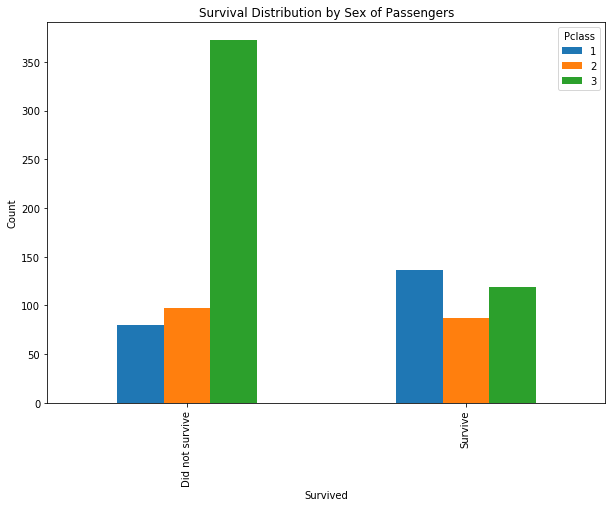

In [20]:
pd.crosstab(index=df_titanic["Survived"],columns=df_titanic["Pclass"]).plot(kind ="bar")
plt.title("Survival Distribution by Sex of Passengers")
plt.ylabel("Count")

### Effect of Age on Survival Passenger

After observing the relationship between survival and passenger class; and between survival and sex of passengers, it is also useful to know whether the age of passengers had an effect in their chances to survive. 

For instance, we want to know if there is a significant difference in between average age of the survivors and the average age of those that did not survive. To check for this we carry out a T-test to check for significant difference in average age of passengers between the survivors and those that did not survive.

The output of the test is given below :  

In [21]:
# Average age of survivors and those that died
age_survived = df_titanic["Age"][df_titanic["Survived"] == "Survive"] 
age_died = df_titanic["Age"][df_titanic["Survived"] == "Did not survive"] 
stats.ttest_ind(age_survived,age_died,nan_policy='omit')

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013483327)

The output above gives a pvalue of ( 0.04 < 0.05 ). This implies that we reject the null hypothesis and conclude that there is indeed a significant difference in average age of survivors and those that did nott survive. 

in the average, those that survived are aboout 2 years younger than those that didn't survive. This is expected as more preference were given to women and children on the survival boats of the ship.

### Effect of Amount of  Fares on Survival 

Just like age, we are also interested in knowing whether the average amount of fares the passengers paid is significantly different between those that survived and those that did not. 

But before we carry out a formal test, we check the disribution of the amount of fare paid using the histogram presented below:

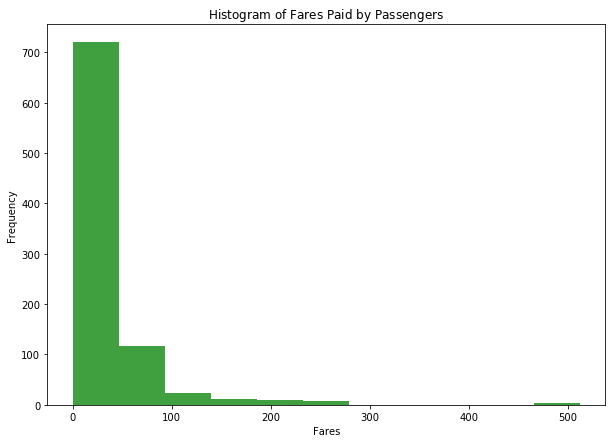

In [22]:
plt.hist(df_titanic["Fare"], facecolor='green', alpha=0.75, bins = 11)
plt.title(r'$\mathrm{Histogram\ of\ Fares\ Paid\ by\ Passengers}$')
plt.xlabel('Fares')
plt.ylabel('Frequency')

The figure above shows the distribution of the fares paid by the passengers. We can see that the distribution is skewed to the right with most of the passengers buying the cheaper tickets while very few passengers bought the expensive tickets. 

Now we proceed to carry out a t-test below to check for significant difference between the survivors and those that didn't survive in average amount of fares paid. The ouput of the test is shown below :

In [23]:
# Average Fare of survivors and those that died
fare_survived = df_titanic["Fare"][df_titanic["Survived"] == "Survive"] 
fare_died = df_titanic["Fare"][df_titanic["Survived"] == "Did not survive"] 
stats.ttest_ind(fare_survived,fare_died,nan_policy='omit')  

Ttest_indResult(statistic=7.9391916608710549, pvalue=6.1201893419241981e-15)

The output above gives a pvalue of (6.12e-15 < 0.05). This implies that we reject the null hypothesis and conclude that there is indeed a significant difference in average fares paid by of survivors and those that did not survive. 

in the average, those that survived paid about $8 more than those that did not survive. This is expected as higher fares paid translate into travelling in a higher passenger class where chances of survival are higher.

## Conclusion and Limitations

The Titanic disaster is arguable one of the deadliest tragedy to have happened and the disaster will definitely be remebered for long. Having access to a dataset that documents the passengers presents a good opportunity to look into the factors that could have affected the survival of the passengers and that is what we have tried to achieve in this report. We were able to establish that the variables Sex, Passenger Class, Age and the amount of fares paid are all factors that affected the chances of survival of the passengers of the ill fated boat.   

Some of the limitations that have been noticed when performing the project:
    
1. The data used for the analysis of this report is just an extract of the data of passengers of the titanic. According to reports, it is estimated that about 2,224 passengers were aboard the titanic while in contrast, this dataset containg information on just 892 passengers. That is about 40% of the total number of the estimated number of passengers on board. This report would have definitely benefited from more records. Furthermore, we do not know for sure how the 891 records of passengers contained in this dataset were selected. Consequently, we are not certain the records of this data are a representative sample of all the passengers aboard the Titanic. 
2. The dataset contains a tangible amount of missing values especially on the (Age) and (Cabin) variables. The missing values contained in the (Age) may have an effect on the results of one of t-tests involving age of passengers especially if these values are not missing at random.
3. The analysis carried out in this report were done in the context of an observational study. Consequently, even though we can conclude that some factors are related to survival based on the evidences provided by the data, we cannot conclude that one or more of the factors assessed in this study caused the survival or non survival of any passenger aboard the Titanic.